<a href="https://colab.research.google.com/github/njugunaObi/Stock-Market-Trend-Predictor/blob/main/Stock_market_prediction_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MARKET TREND PREDICTION ALGORITHM.**

This project aims to analyze historical market data, to train a machine learning model to predict market trends such as bull or bear markets.

The model being used for predictions will be an LSTM (Long-short term memory) algorithm.



In [1]:
import pandas as pd

data = pd.read_csv('stocks.csv')

data

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600


In [2]:
# further cleaning & validation

print(data.info())


print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB
None
             Open        High         Low       Close   Adj Close  \
count  248.000000  248.000000  248.000000  248.000000  248.000000   
mean   215.252093  217.919662  212.697452  215.381674  215.362697   
std     91.691315   92.863023   90.147881   91.461989   91.454750   
min     89.540001   90.129997   88.860001   89.349998   89.349998   
25%    135.235004  137.440004  134.822495  136.347498  136.347498   
50%    208.764

In [3]:
# searching for duplicates
duplicates = data.duplicated()
print(duplicates)

# searching for missing values

missing = data.isnull().sum()

print(missing)

0      False
1      False
2      False
3      False
4      False
       ...  
243    False
244    False
245    False
246    False
247    False
Length: 248, dtype: bool
Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


**CLEANING & VALIDATION FINDINGS**

After reading & cleaning the data, the following has been found;


*   There are a total of 248 entries & 8 columns within the dataset.
*   The mean stock price on market open is $215, and on market close its also 215.

*   The highest average price of the stock market is $218.

*   There are no missing values or duplicated values within the dataset.





**MODELLING THE DATA.**

The machine learning model we shall use for predicting the market movement will be an LSTM (Long-short term memory) algorithm.

The model is chosen as the model learns to capture patterns and relationships between previous stock prices and future price movements.



Epoch 1/10
6/6 [==============================] - 21s 2s/step - loss: 0.2792
Epoch 2/10
6/6 [==============================] - 15s 3s/step - loss: 0.0682
Epoch 3/10
6/6 [==============================] - 15s 3s/step - loss: 0.0366
Epoch 4/10
6/6 [==============================] - 15s 3s/step - loss: 0.0268
Epoch 5/10
6/6 [==============================] - 15s 3s/step - loss: 0.0213
Epoch 6/10
6/6 [==============================] - 15s 3s/step - loss: 0.0175
Epoch 7/10
6/6 [==============================] - 18s 3s/step - loss: 0.0161
Epoch 8/10
6/6 [==============================] - 16s 3s/step - loss: 0.0152
Epoch 9/10
6/6 [==============================] - 15s 3s/step - loss: 0.0164
Epoch 10/10
2/2 [==============================] - 2s 256ms/step
Root Mean Squared Error (RMSE): 4.534406269956578


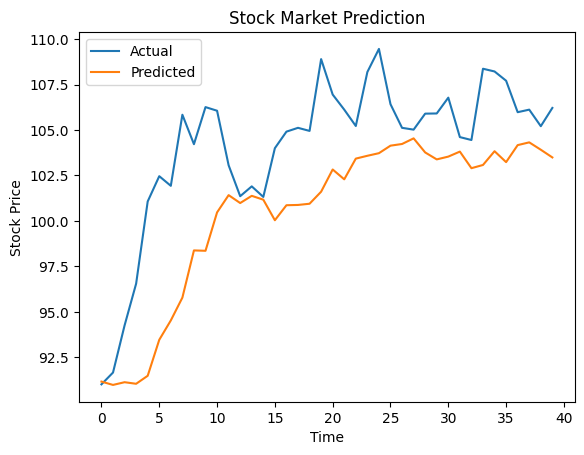

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# Preprocessing the data by scaling it between 0 and 1 using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Splitting the data into training and testing sets
train_data = scaled_data[:int(0.8 * len(scaled_data))]
test_data = scaled_data[int(0.8 * len(scaled_data)):]

# Define the number of time steps to consider for each prediction
time_steps = 10

# Creating training and testing datasets with time steps
def create_dataset(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps, 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Reshaping the input data to be compatible with LSTM input shapes
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Building the LSTM model
model = Sequential()
model.add(LSTM(units=1500, return_sequences=True, input_shape=(time_steps, 1)))
model.add(LSTM(units=1500))
model.add(Dense(units=1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions on the test dataset
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Evaluating the model's performance
rmse = np.sqrt(np.mean((predictions - scaler.inverse_transform(y_test.reshape(-1, 1)))**2))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Visualizing the predicted values against the actual values
import matplotlib.pyplot as plt

plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Market Prediction')
plt.legend()
plt.show()


**MODELLING EXPLANATION & CONCLUSIONS**

*MODEL EXPLANATION;*

1. The stock market data is preprocessed by scaling it between 0 and 1 using MinMaxScaler.

2. The data is then split into training and testing sets.

3. A function create_dataset is defined to create training and testing datasets with a specified number of time steps.

4. The input data is reshaped to be compatible with the LSTM input shape.

5. An LSTM model is built using Sequential from Keras.
The model is compiled and trained on the training dataset.

6. Predictions are made on the test dataset and then inverse transformed to obtain actual stock prices.

7. The model’s performance is evaluated using Root Mean Squared Error (RMSE).

Finally, the predicted values are visualized against the actual values using matplotlib.




*CONCLUSIONS;*

From the plot we see that the model is able to predict the market trend relatively well over the designated period of time.

This is because we used 1500 neurons or units for the model to use in prediction. The tuning of this parameter however is computationally intensive and would require higher hardware power to execute as well as the potential to overfit the data.

Overall the model performs well and is definitely a good predictor for the data.